# Time series analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [3]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [22]:
df = pd.read_json('logins.json')

In [23]:
df.set_index('login_time', inplace=True) # this step ( time as inex) will help us to do time series calculations
df['logincount'] = 1
df.resample('15T').sum().head()

,logincount
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [24]:
df=df.resample('15T').sum() #Login counts based on 15 minute time intervals

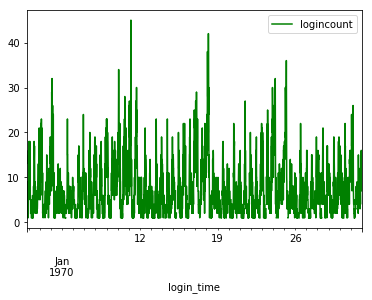

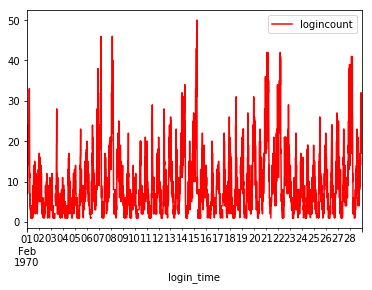

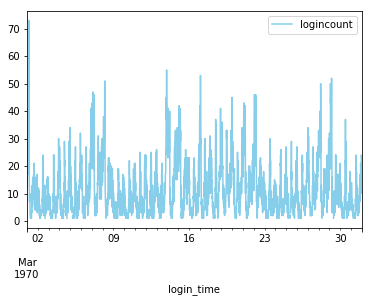

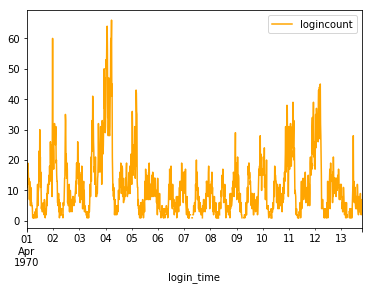

In [25]:
df['1970-01'].plot(color='green')
df['1970-02'].plot(color='red')
df['1970-03'].plot(color='skyblue')
df['1970-04'].plot(color='orange')
plt.show()

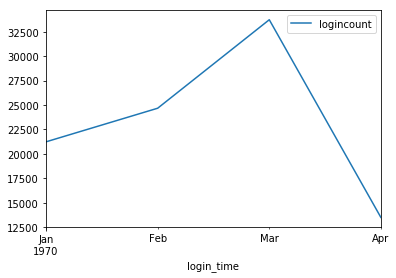

In [26]:
df.resample('M').sum().plot()
plt.show()

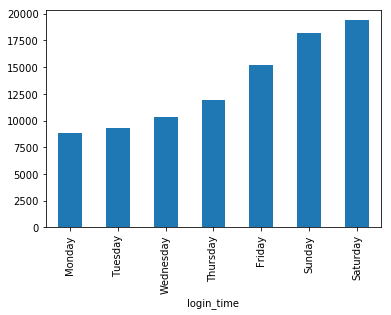

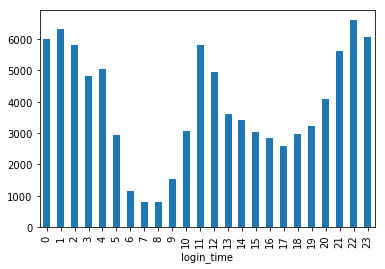

In [40]:
df.groupby(df.index.weekday_name)['logincount'].sum().sort_values().plot(kind='bar')
plt.show()
df.groupby(df.index.hour)['logincount'].sum().plot(kind='bar')
plt.show()

# Conclusion:
    1) Weekend logins are more
    2) Morining Rush hours and after 8PM until 4 AM traffic is more 

# Gotham and Metropolis Experiment

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

### >The best way to test this Hypothesis is to perform a A/B test.

### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

#### a. how you will implement the experiment

#### >The best way is to perform this test is to select 30% of night and 30% of day driver parners for the varition group(A) and rest of the population for the control group(B). 

#### b. what statistical test(s) you will conduct to verify the significance of the observation
#### >We will use the t-test to verify the significance of the observation

#### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
#### > If there is an increase in traffic in group A (reimbursed group), it would mean that the experiment was successful and that Ultimate should reimburse all toll costs.
#### > If there is a decrease or no chnage in traffic in group A

https://hbr.org/2017/06/a-refresher-on-ab-testing

In [41]:
import json
json_data=open('ultimate_data_challenge.json')
data = json.load(json_data)
df_=pd.DataFrame(data)

In [43]:
df_.sample(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
47620,2.36,5.0,4.3,1.0,Winterfell,2014-03-21,iPhone,2014-01-01,0.0,0,True,100.0
48963,5.45,5.0,NaN,1.0,Astapor,2014-03-27,iPhone,2014-01-20,0.0,0,True,100.0
24246,4.29,4.5,3.6,1.0,Winterfell,2014-06-21,iPhone,2014-01-01,0.0,5,True,63.2


In [65]:
print(df_.info())
print(df_.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB
None
avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                

In [47]:
df_[['last_trip_date','signup_date']] = df_[['last_trip_date','signup_date']].apply(pd.to_datetime,errors='coerce')

In [53]:
df_.avg_rating_by_driver[df_.avg_rating_by_driver.notnull()].count()

49799

In [54]:
df_.avg_rating_of_driver[df_.avg_rating_of_driver.notnull()].count()

41878

In [57]:
df_["avg_rating_of_driver"].fillna(df_.groupby("city")["avg_rating_of_driver"].transform("mean"), inplace=True)

In [59]:
df_["avg_rating_by_driver"].fillna(df_.groupby("city")["avg_rating_by_driver"].transform("mean"), inplace=True)

In [60]:
df_.head(13)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,4.630593,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,4.532996,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [66]:
df_['phone'].value_counts() 
# checking the type of phones. since iPhone is the most popular phone we will fill all blanks with iPhone

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [73]:
df_.groupby("city")["phone"].value_counts()

city            phone  
Astapor         iPhone     11290
                Android     5244
King's Landing  iPhone      7632
                Android     2498
Winterfell      iPhone     16056
                Android     7280
Name: phone, dtype: int64

In [74]:
df_.phone.fillna(df_.groupby("city")["phone"].max(), inplace=True)

# Analysis

### Retained User:
The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

In [86]:
active_usr=df_['phone'][df_.last_trip_date<=df_.signup_date+pd.DateOffset(days=30)].count()
inactive_usr=df_['phone'][df_.last_trip_date>df_.signup_date+pd.DateOffset(days=30)].count()

In [88]:
active_usr,inactive_usr,active_usr+inactive_usr

(13027, 36973, 50000)

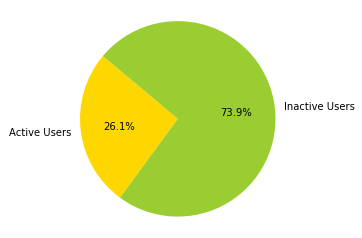

In [121]:
# Data to plot
labels = 'Active Users', 'Inactive Users'
sizes = [active_usr,inactive_usr]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=0, startangle=140)
 
plt.axis('equal')
plt.show()

In [124]:
df_['active'] = 0
df_.loc[df_.last_trip_date<=df_.signup_date+pd.DateOffset(days=30), 'active'] = 1

In [126]:
import seaborn as sns

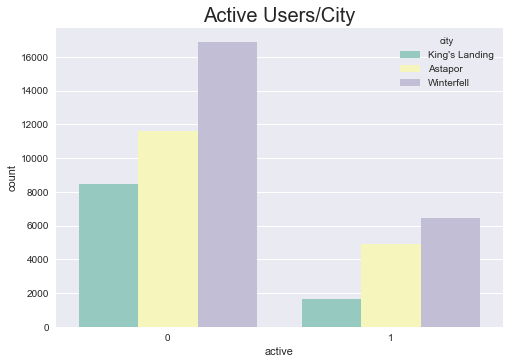

In [129]:
sns.countplot(data=df_, x='active', hue='city',palette="Set3")
plt.title('Active Users/City', fontsize=20)
plt.show()

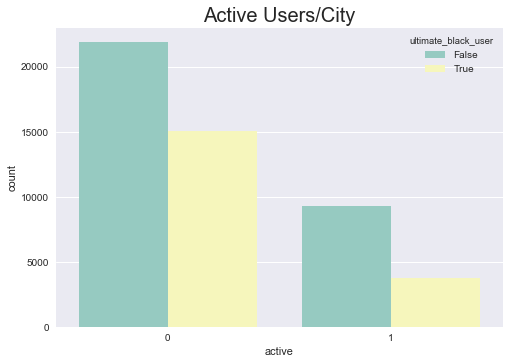

In [138]:

sns.countplot(data=df_[['phone','active','ultimate_black_user']], x='active', hue='ultimate_black_user',palette="Set3")
plt.title('Active Users/City', fontsize=20)
plt.show()

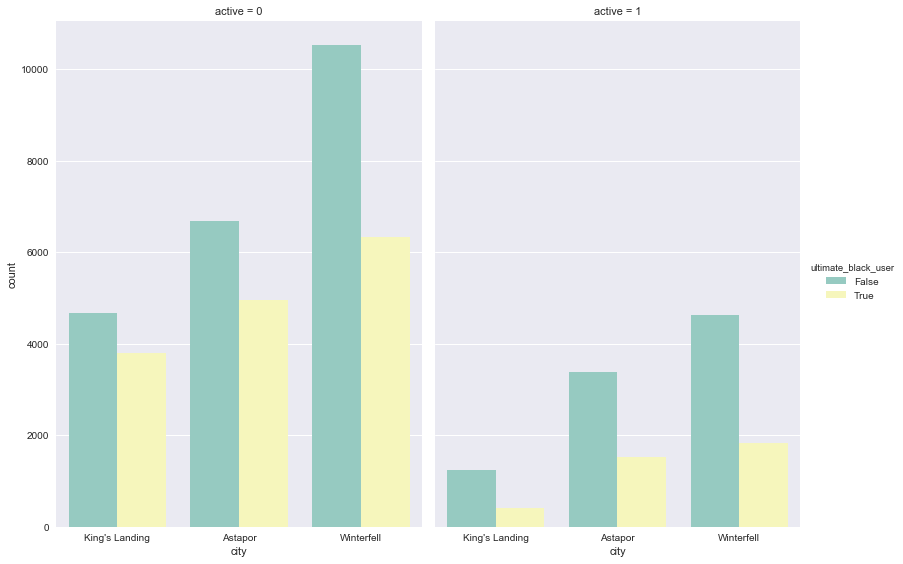

In [143]:
sns.factorplot(x="city", hue="ultimate_black_user", col="active",\
               data=df_, kind="count",size=8, aspect=.7,palette="Set3");
plt.show()

# Predictive Modeling 

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [161]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(1)
memory usage: 4.6+ MB


In [172]:
citydict = {0:"King's Landing",1:"Astapor",2:"Winterfell"}
phonedict = {0:'iPhone',1:'Android'}
inv_map_city = {v: k for k, v in citydict.items()}
df_.city=df_.city.apply(lambda x:inv_map_city[x])
inv_map_phone = {v: k for k, v in phonedict.items()}
df_.phone=df_.phone.apply(lambda x:inv_map_phone[x])
df_['ultimate_black_user']=df_.ultimate_black_user.apply(lambda x: int(x))

In [186]:
df_ml=df_[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'phone','surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct','active']].copy()

In [187]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int64
phone                     50000 non-null int64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int64
weekday_pct               50000 non-null float64
active                    50000 non-null int64
dtypes: float64(6), int64(5)
memory usage: 4.2 MB


In [188]:
df_ml.sample(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
40750,2.64,4.8,4.6,1.15,2,0,18.2,1,0,53.2,0
4610,1.58,5.0,3.5,1.00,2,0,0.0,2,0,100.0,1


In [189]:
#creating feature(X) and target(y) dataset
X = df_ml.drop(['active'],axis=1)
y = df_ml['active']

In [190]:
from sklearn.model_selection import train_test_split
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=.3)

# Using Basic Logistic Regression, Random Forest and KNeighbors

In [191]:
logreg = LogisticRegression()
# Fit the model on the trainng data.
logreg.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(logreg.predict(X_test), y_test))

0.739266666667


In [198]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf_rf.predict(X_test), y_test))

0.899933333333


In [199]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(knn.predict(X_test), y_test))

0.893933333333


# Tuning the Models

In [202]:
from sklearn.model_selection import GridSearchCV
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

#using grid search techquine 
param_grid={'C':Cs}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5,scoring="accuracy")
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print('------------GridSearchCV--------')
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

------------GridSearchCV--------
Tuned Logistic Regression Parameters: {'C': 0.001}
Best score is 0.7393142857142857


In [203]:
#using grid search techquine 
param_grid = {'n_estimators': np.arange(10,50,10),
              'min_samples_leaf': np.arange(1,50,10),
              'max_features': ['auto', 'sqrt', 'log2']}

clf_rf = RandomForestClassifier()
clf_rf_cv = GridSearchCV(clf_rf, param_grid, cv=5,scoring="accuracy")
clf_rf_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print('------------GridSearchCV--------')
print("Tuned Random Forest Parameters: {}".format(clf_rf_cv.best_params_)) 
print("Best score is {}".format(clf_rf_cv.best_score_))

------------GridSearchCV--------
Tuned Random Forest Parameters: {'max_features': 'auto', 'min_samples_leaf': 11, 'n_estimators': 30}
Best score is 0.9143428571428571


In [205]:
metrics = ['minkowski','euclidean','manhattan'] 
weights       = ['uniform','distance'] 
numNeighbors  = np.arange(5,10)
param_grid    = dict(metric=metrics,weights=weights,n_neighbors=numNeighbors)

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5,scoring="accuracy")
knn_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print('------------GridSearchCV--------')
print("Tuned KNeighbors Classifier Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

------------GridSearchCV--------
Tuned KNeighbors Classifier Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score is 0.8984571428571428


## Conclusion:
Based on the above tuning we can see that Random Forest performs the best model prediction. For riders retention, Ultimate Inc. should implement a lower surge charge for non winterfell riders.  